# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [43]:
chipo = pd.read_csv("chipotle.tsv",sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

In [23]:
top5 = chipo.groupby('item_name')[['quantity']].sum().sort_values(by='quantity',ascending=False).head(5)

<Axes: xlabel='item_name', ylabel='quantity'>

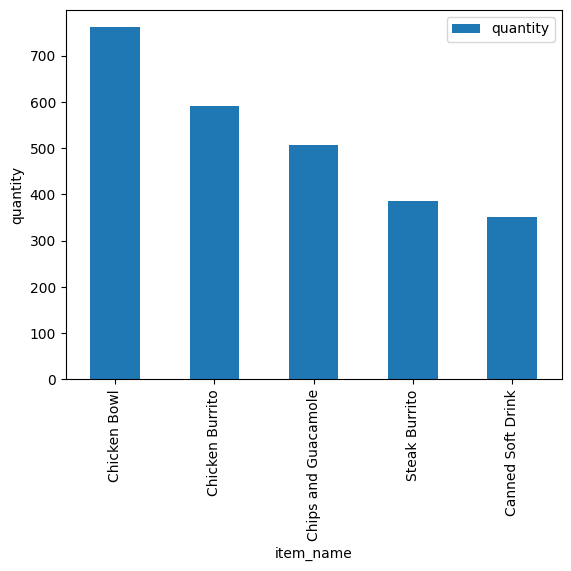

In [33]:
top5.plot(kind="bar",ylabel="quantity")

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [45]:
#removign $ from item price 
fn = lambda x:float(x[1:])
chipo['item_price'] = chipo['item_price'].apply(fn)

In [46]:
chipo['order_price'] =chipo['item_price']*chipo['quantity'].astype(int)

In [54]:
#grouping by order id to get unique items
data = chipo.groupby('order_id')[['quantity','order_price']].sum()

In [56]:
data

,quantity,order_price
order_id,,
1,4,11.56
2,2,33.96
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


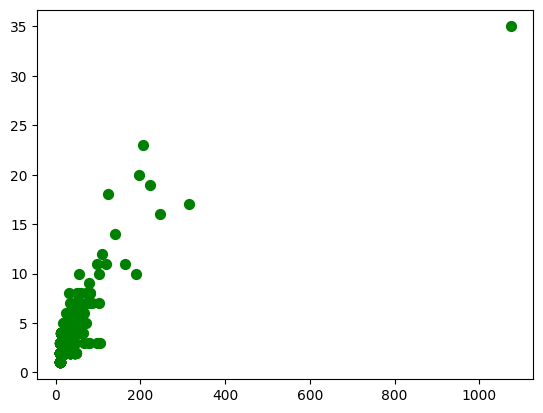

In [55]:
plt.scatter(x=data.order_price,y=data.quantity,s=50,c='green')

In [47]:
chipo.head(20)

,order_id,quantity,item_name,choice_description,item_price,order_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


### Step 7. BONUS: Create a question and a graph to answer your own question.